# First Name: Kaung Khant
# Last Name: Naing

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [2]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
bottle['Recind'] = pd.to_numeric(bottle['RecInd'], errors='coerce') #convert variable to numeric
bottle['R_SALINITY'] = pd.to_numeric(bottle['R_SALINITY'], errors='coerce') #convert variable to numeric

# Data management 

In [4]:
sub1=bottle[(bottle['Cst_Cnt']<=1)]
sub2=sub1.copy()

In [5]:
sub2['RecInd'] = sub2['RecInd'].astype('category') 

# Box Plot

<IPython.core.display.Javascript object>


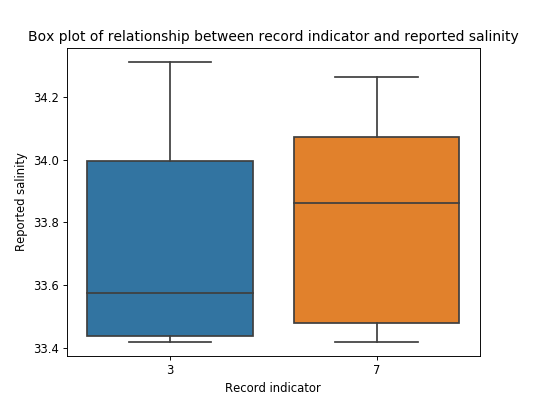

Text(0.5, 1.0, 'Box plot of relationship between record indicator and reported salinity')

In [6]:
%matplotlib notebook
sns.boxplot (x=sub2['RecInd'], y=sub2['R_SALINITY'])
plt.xlabel('Record indicator')
plt.ylabel('Reported salinity')
plt.title('Box plot of relationship between record indicator and reported salinity')

# ANOVA

In [7]:
model1 = smf.ols(formula= 'R_SALINITY ~ C(RecInd)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:             R_SALINITY   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4950
Date:                Fri, 27 Sep 2019   Prob (F-statistic):              0.488
Time:                        21:14:55   Log-Likelihood:                -6.6588
No. Observations:                  28   AIC:                             17.32
Df Residuals:                      26   BIC:                             19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.7217      0.092    366.

In [8]:
sub3 = sub2[['R_SALINITY','RecInd']].dropna()

In [9]:
print('Means for reported salinity by recorded indicator')
m1 = sub3.groupby('RecInd').mean()
print (m1)

Means for reported salinity by recorded indicator
        R_SALINITY
RecInd            
3        33.721667
7        33.807250


In [10]:
print('standard deviation for reported salinity by recorded indicator')
sd1 = sub3.groupby('RecInd').std()
print (sd1)

standard deviation for reported salinity by recorded indicator
        R_SALINITY
RecInd            
3         0.329871
7         0.309932
